# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [78]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
plt.rcParams['figure.figsize'] = [15, 5]

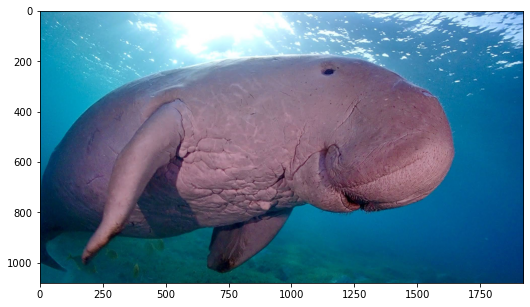

In [152]:
img = cv2.imread('imgs/dugong.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

White src = [255 255 255]
Coeffs=[1. 1. 1.]
balanced pixel -> [255. 255. 255.]


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1e78198a160>)

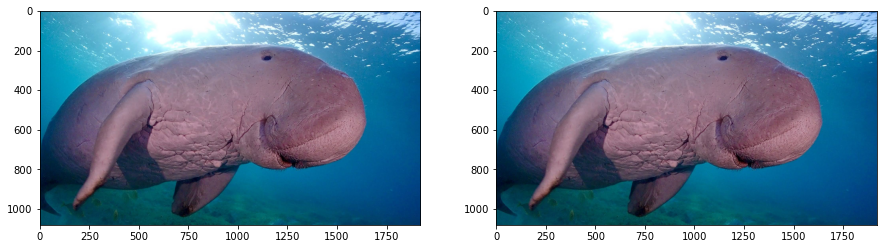

In [156]:
# Define white patch and the coefficients
row, col = 25, 664 
white = img[row, col, :]
print(f'White src = {white}')
coeffs = 255.0/white
print(f'Coeffs={coeffs}')

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)

modifier = 1

for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel] * modifier

print(f'balanced pixel -> {balanced[row, col, :]}')

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Gray world
This algorithm assumes that a scene, on average, is gray.

rows:1080, cols:1920, channels:3

mean_r - 79.73711419753086
mean_g - 113.1090374228395
mean_b - 140.70503038194445

kr = 1.7646115212218394
kg = 1.2439769057174617
kb = 1.0

Max value of balanced R: 449
Max value of balanced G: 317
Max value of balanced B: 255

new_mean_r (balanced) - 140.24022135416666
new_mean_g (balanced) - 140.21721691743826
new_mean_b (balanced) - 140.70503038194445


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1e797907310>)

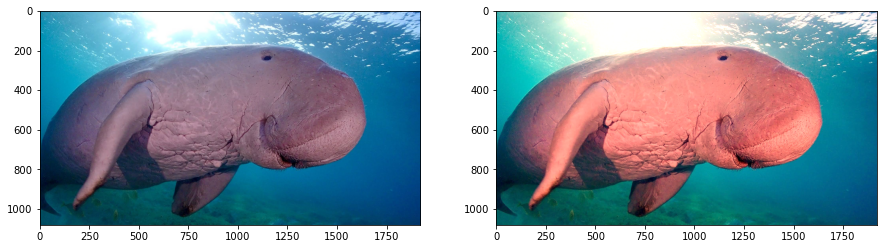

In [166]:
# Load your image
img_name = 'imgs/dugong.jpg'
# img_name = 'imgs/kodim09.png'
# print(f'Loading image "{os.getcwd()}{img_name}"')
img = cv2.imread(img_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

R, G, B = 0, 1, 2
rows, cols, ch = img.shape
total_pixels = rows * cols
print(f'rows:{rows}, cols:{cols}, channels:{ch}')

# plt.imshow(img)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = np.sum(img[...,R]) / total_pixels
mean_g = np.sum(img[...,G]) / total_pixels
mean_b = np.sum(img[...,B]) / total_pixels

print(f'\nmean_r - {mean_r}')
print(f'mean_g - {mean_g}')
print(f'mean_b - {mean_b}')

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.
kr = max(mean_r, mean_g, mean_b) / mean_r
kg = max(mean_r, mean_g, mean_b) / mean_g
kb = max(mean_r, mean_g, mean_b) / mean_b

print(f'\nkr = {kr}')
print(f'kg = {kg}')
print(f'kb = {kb}')

# Apply color balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.uint32)  

modifier = 1 # just to play with :)

balanced[..., R] = img[..., R] * kr * modifier
balanced[..., G] = img[..., G] * kg * modifier
balanced[..., B] = img[..., B] * kb * modifier

print(f'\nMax value of balanced R: ', end='')
print(f'{np.max(balanced[...,R])}')

print(f'Max value of balanced G: ', end='')
print(f'{np.max(balanced[...,G])}')

print(f'Max value of balanced B: ', end='')
print(f'{np.max(balanced[...,B])}\n')

new_mean_r = np.sum(balanced[...,R]) / total_pixels
new_mean_g = np.sum(balanced[...,G]) / total_pixels
new_mean_b = np.sum(balanced[...,B]) / total_pixels

print(f'new_mean_r (balanced) - {new_mean_r}')
print(f'new_mean_g (balanced) - {new_mean_g}')
print(f'new_mean_b (balanced) - {new_mean_b}')

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(np.clip(balanced, 0, 255))

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.


max_r - 178
max_g - 255
max_b - 255

kr - 1.4325842696629214
kg - 1.0
kb - 1.0


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1e796b05d90>)

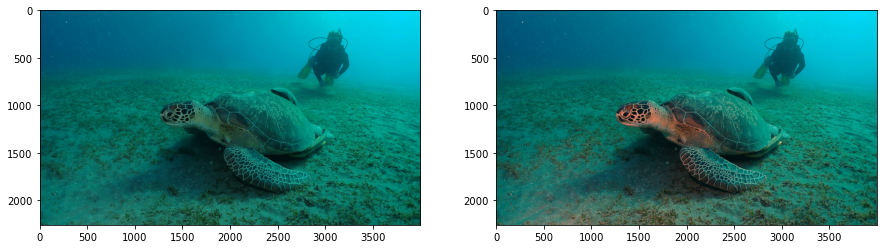

In [169]:
# Load your image
# i had to find image withous bright while color to find max values < 255
img_name = 'imgs/turtle.jpeg'
img = cv2.imread(img_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
R, G, B = 0, 1, 2
rows, cols, ch = img.shape

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(img[...,R])
max_g = np.max(img[...,G])
max_b = np.max(img[...,B])

print(f'\nmax_r - {max_r}')
print(f'max_g - {max_g}')
print(f'max_b - {max_b}')

kr = 255 / max_r
kg = 255 / max_g
kb = 255 / max_b

print(f'\nkr - {kr}')
print(f'kg - {kg}')
print(f'kb - {kb}')

# Apply scale-by-max balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.uint32) 

modifier = 1

balanced[..., R] = img[..., R] * kr * modifier
balanced[..., G] = img[..., G] * kg * modifier 
balanced[..., B] = img[..., B] * kb * modifier


plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(np.clip(balanced, 0, 255))